<a href="https://colab.research.google.com/github/shahbazbaig38/Text_Prediction_Using_Tokenization/blob/main/Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Required Modules

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 
import pandas as pd

# 2. Input Data abd Preprocessing

In [ ]:
tokenizer = Tokenizer()

data = pd.read_csv("eminem.txt", sep = "/n")
corpus = data.to_string().lower().split("/n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'you': 2, 'a': 3, 'i': 4, 'to': 5, 'and': 6, 'in': 7, 'it': 8, "i'm": 9, 'but': 10, 'of': 11, 'my': 12, 'that': 13, 'this': 14, 'me': 15, 'get': 16, 'like': 17, 'be': 18, 'better': 19, 'on': 20, 'he': 21, 'with': 22, 'not': 23, 'one': 24, 'what': 25, 'as': 26, 'back': 27, 'only': 28, 'rap': 29, 'all': 30, 'so': 31, 'for': 32, 'do': 33, "it's": 34, 'was': 35, 'go': 36, 'your': 37, "don't": 38, 'from': 39, 'they': 40, 'is': 41, 'when': 42, 'looking': 43, 'boy': 44, 'never': 45, "he's": 46, 'got': 47, 'god': 48, 'let': 49, 'music': 50, 'up': 51, 'if': 52, 'are': 53, 'make': 54, 'shot': 55, 'know': 56, 'off': 57, 'his': 58, 'blow': 59, 'yourself': 60, 'once': 61, 'lose': 62, 'opportunity': 63, 'moment': 64, 'chance': 65, 'can': 66, "you're": 67, 'just': 68, 'say': 69, 'still': 70, 'no': 71, 'at': 72, 'goes': 73, 'own': 74, 'feel': 75, 'think': 76, 'nod': 77, 'these': 78, 'how': 79, "'cause": 80, 'fuck': 81, 'cause': 82, 'oh': 83, 'miss': 84, 'comes': 85, 'lifetime': 86, 'now': 8

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


In [ ]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(xs[6])

[  0   0   0 ...  36 157  20]


In [ ]:
print(ys[6])

[0. 0. 1. ... 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[  0   0   0 ... 156  36 157]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'the': 1, 'you': 2, 'a': 3, 'i': 4, 'to': 5, 'and': 6, 'in': 7, 'it': 8, "i'm": 9, 'but': 10, 'of': 11, 'my': 12, 'that': 13, 'this': 14, 'me': 15, 'get': 16, 'like': 17, 'be': 18, 'better': 19, 'on': 20, 'he': 21, 'with': 22, 'not': 23, 'one': 24, 'what': 25, 'as': 26, 'back': 27, 'only': 28, 'rap': 29, 'all': 30, 'so': 31, 'for': 32, 'do': 33, "it's": 34, 'was': 35, 'go': 36, 'your': 37, "don't": 38, 'from': 39, 'they': 40, 'is': 41, 'when': 42, 'looking': 43, 'boy': 44, 'never': 45, "he's": 46, 'got': 47, 'god': 48, 'let': 49, 'music': 50, 'up': 51, 'if': 52, 'are': 53, 'make': 54, 'shot': 55, 'know': 56, 'off': 57, 'his': 58, 'blow': 59, 'yourself': 60, 'once': 61, 'lose': 62, 'opportunity': 63, 'moment': 64, 'chance': 65, 'can': 66, "you're": 67, 'just': 68, 'say': 69, 'still': 70, 'no': 71, 'at': 72, 'goes': 73, 'own': 74, 'feel': 75, 'think': 76, 'nod': 77, 'these': 78, 'how': 79, "'cause": 80, 'fuck': 81, 'cause': 82, 'oh': 83, 'miss': 84, 'comes': 85, 'lifetime': 86, 'now': 8

# 3. Model Creation

In [ ]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add((LSTM(100)))
  #model.add(Dropout(0.2))
  #model.add(LSTM(100))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
86/86 [==============================] - 10s 100ms/step - loss: 6.6199 - accuracy: 0.0252
Epoch 2/100
86/86 [==============================] - 9s 100ms/step - loss: 6.2029 - accuracy: 0.0281
Epoch 3/100
86/86 [==============================] - 9s 100ms/step - loss: 6.0883 - accuracy: 0.0321
Epoch 4/100
86/86 [==============================] - 9s 100ms/step - loss: 5.9768 - accuracy: 0.0303
Epoch 5/100
86/86 [==============================] - 9s 99ms/step - loss: 5.8797 - accuracy: 0.0296
Epoch 6/100
86/86 [==============================] - 9s 99ms/step - loss: 5.7797 - accuracy: 0.0413
Epoch 7/100
86/86 [==============================] - 9s 100ms/step - loss: 5.6696 - accuracy: 0.0471
Epoch 8/100
86/86 [==============================] - 9s 99ms/step - loss: 5.5561 - accuracy: 0.0522
Epoch 9/100
86/86 [==============================] - 9s 99ms/step - loss: 5.4224 - accuracy: 0.0690
Epoch 10/100
86/86 [==============================] - 9s 100ms/step - loss: 5.2951 - accuracy:

# 4. Ploting the Graph

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

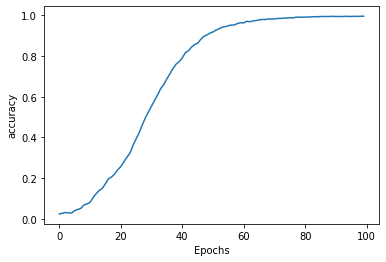

In [ ]:
plot_graphs(history, 'accuracy')

# 5. Let's Test our Prediction

In [ ]:
seed_text = "All my people from the front"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0),axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

All my people from the front to you and not to hurt your feelings 0 but i'm only going to get this one chance 1 something's wrong i can feel it six minutes slim shady you're on 2 just a feeling i've got like something's about to happen but i don't know what 3 if that
